In [17]:
import matplotlib 
from matplotlib import pyplot as plt
import matplotlib.image as mimage
from random import randrange,randint
import numpy as np
from tqdm import tqdm
import json
from math import exp, sin, cos

matplotlib.rcParams['figure.figsize'] = [20, 5]

In [18]:
class NeuralNetwork:
    
    def __init__(self, input_size = 20, learning_rate = 0.01):
        self.learning_rate = learning_rate
        
        self.input_size = input_size
        self.hidden_size = 10
        
        self.error = 0.005
        
        self.input = []
        self.hidden = []
        self.past_hidden = []
        self.output = []
        
        self.w_1 = np.random.uniform(low=-0.1, high=0.1, size=(self.hidden_size, self.input_size))
        self.w_2 = np.random.uniform(low=-0.1, high=0.1, size=(1, self.hidden_size))
        self.w_3 = np.random.uniform(low=-0.1, high=0.1, size=(self.hidden_size, self.hidden_size))
    
    def train(self, trainint_data):
        i = self.input_size
        self.hidden = np.zeros((self.hidden_size,1))
        for index in tqdm(range(len(trainint_data) - self.input_size - 1)):
            self.input = trainint_data[index:self.m + index]
            self.past_hidden = self.hidden
            temp1 = np.dot(self.w_3, self.past_hidden)
            temp2 = np.dot(self.w_1, self.input)
            
            self.hidden = np.tanh(temp1 + temp2)

            self.output = np.dot(self.w_2, self.hidden)
            
            error = self.output[0,0] - trainint_data[self.m + index]
            
            self.accuracy_increase(error, self.input, self.hidden, self.output, self.past_hidden)
            
    def test(self, input):
        td = input
        self.input = input[:self.m]
        self.hidden = np.zeros((self.hidden_size,1))
                    
        output_subsequence = []
        for el in self.input:
            output_subsequence.append(el)
        
        arrs = np.zeros((self.m,1))
        arrs[:] = input[:self.m]
        count_of_iteration = len(td) - self.input_size
        while count_of_iteration>0:
            self.past_hidden = self.hidden
            temp1 = np.dot(self.w_3, self.past_hidden)
            temp2 = np.dot(self.w_1, arrs)
            
            self.hidden = np.tanh(temp1 + temp2)
                
            self.output = np.dot(self.w_2, self.hidden)
            
            output_subsequence.append((self.output[0]))
            arrs[:] = output_subsequence[len(output_subsequence)-self.m:len(output_subsequence)]
            count_of_iteration -= 1
        
        plt.plot(test_data_range, input)
        plt.plot(test_data_range, output_subsequence)
    
                
    def accuracy_increase(self, error, input_neurons_layer, hidden_neurons_layer, output_neurons_layer, context):
        delta = error
    
        past_w_2 = self.w_2
        for i in range(len(self.w_2)):
            self.w_2[0,i] -= self.learning_rate * delta * hidden_neurons_layer[i]
        
        for k in range(len(self.w_1[0])):
            for i in range(len(self.w_1)):
                self.w_1[i,k] -= self.learning_rate * delta * past_w_2.T[i] * input_neurons_layer[k] * (1 - hidden_neurons_layer[i]**2)

        for k in range(len(self.w_3[0])):
            for i in range(len(self.w_3)):
                self.w_3[i,k] -= self.learning_rate * delta * past_w_2.T[i] * context[k] * (1 - hidden_neurons_layer[i]**2)
    

In [19]:
input_len = 20

part_of_training_data = 0.8

data_range = np.linspace(0,200,1000) 
data = [[cos(i) + sin(2*i)] for i in data_range]
  
train_data = data[:int(part_of_training_data*len(data))]
test_data = data[int(part_of_training_data*len(data)):]

test_data_range = data_range[int(part_of_training_data*len(data)):]

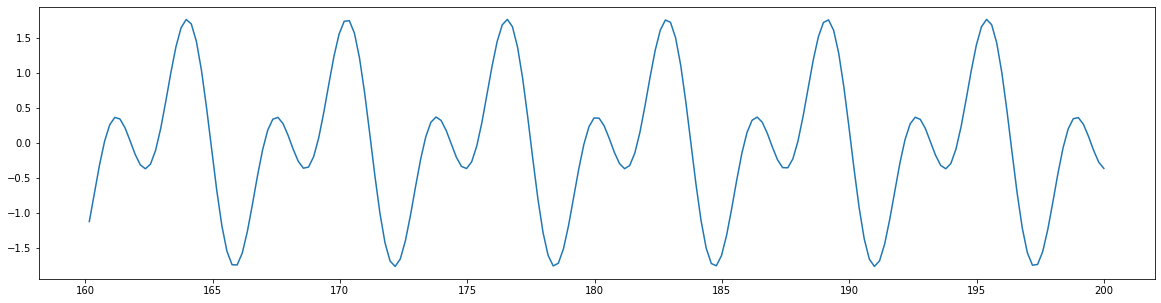

In [20]:
matplotlib.rcParams['figure.figsize'] = [20, 5]
plt.plot(test_data_range, test_data)

In [21]:
neuralNetwork = NeuralNetwork(input_len,learning_rate=0.001)

In [22]:
for ind in range(100):
    neuralNetwork.train(train_data)

100%|██████████| 779/779 [00:03<00:00, 214.51it/s]


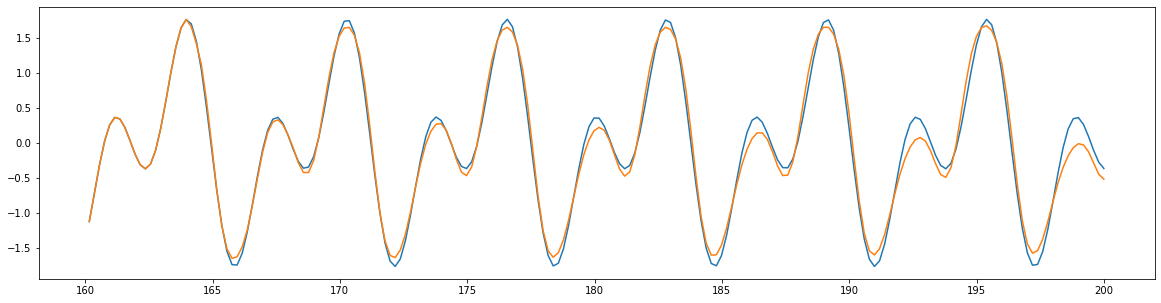

In [23]:
neuralNetwork.test(test_data)